## DSC540 Weeks 9 & 10: Advanced Data Gathering and Visualization

##### Bryan Rogers
##### Bellevue University
##### DSC540: Data Preperation
##### 10/23/23

### 1. Data Wrangling with Python: Activity 9, page 294

### Activity 9: Extracting the Top 100 eBooks from Gutenberg

#### 1. Import the necessary libraries, including regex and beautifulsoup

In [82]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

#### 2. Check the SSL certificate

In [83]:
# create an SSL context object named 'ctx'
ctx = ssl.create_default_context()
# disable hostname checking within the SSL context
ctx.check_hostname = False
# set the verification mode of the SSL context to CERT_NONE
ctx.verify_mode = ssl.CERT_NONE

#### 3. Read the HTML from the URL

In [84]:
# read the HTML from the URL and generate a GET request into a 'response' variable
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

#### 4. Write a small function to check the status of the web request.

In [85]:
# create a function to check the status of the HTTP web request 
def status_check(r):
    if r.status_code==200:
        print("Correct")
        return 1
    else:
        print("Incorrect")
        return -1

In [86]:
status_check(response)

Correct


1

#### 5. Decode the response and pass this on to BeautifulSoup for HTML parsing.

In [87]:
# decode the response of the HTTP into a 'contents' variable
contents = response.content.decode(response.encoding)

In [88]:
# create a BeautifulSoup object that parses the HTTP contents 
soup = BeautifulSoup(contents, 'html.parser')

#### 6. Find all the href tags and store them in the list of links. Check what the list looks like – print the first 30 elements.

In [89]:
# create an empty list of links to store all of the href tags
list_links=[]

In [90]:
# use a 'for' loop to find all of the href tags and store them in the list created above
for link in soup.find_all('a'):
    
    list_links.append(link.get('href'))

In [91]:
# print the first 30 elements of the list links 
list_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

#### 7. Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks. 

#### 8. Initialize the empty list to hold the file numbers over an appropriate range and use regex to find the numeric digits in the link href string. Use the findall method.

In [92]:
# create an empty list called 'booknumbers'
booknumbers = []

In [95]:
# create a 'for' loop to generate a regular expression to find the numeric digits in the links 
for i in range(19,119):
    link = list_links[i]
    link = link.strip()
     # regular expression to find the numeric digits in the link string
    n = re.findall('[0-9]+',link)
    if len(n)==1:
        # append the files cast as integers
        booknumbers.append(int(n[0]))

In [96]:
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are:\n"+"-"*57)
print(booknumbers)


The file numbers for the top 100 ebooks on Gutenberg are:
---------------------------------------------------------
[1, 1, 7, 7, 30, 30, 33283, 84, 1342, 1513, 25344, 345, 11, 64317, 46, 174, 2542, 5200, 43, 844, 1080, 1952, 98, 1260, 1661, 1400, 72001, 2701, 2591, 72004, 1232, 72005, 2600, 76, 2554, 219, 6130, 41, 23, 72003, 28054, 71999, 408, 72002, 55, 205, 1727, 3207, 1399, 4300, 45, 16, 41445, 768, 16328, 2148, 27827, 100, 3825, 72006, 5740, 15399, 2814, 42324, 1184, 140, 996, 2000, 67098, 158, 74, 244, 72000, 932, 120, 4363, 2852, 35, 600, 10007, 36, 161, 514, 1250, 1497, 30254, 1251, 215, 7370, 8492, 203, 8800]


#### 9. What does the soup object's text look like? Use the .text method and print only the first 2,000 characters (do not print the whole thing, as it is too long).

In [97]:
# print a soup object that only shows the first 2000 characters
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2023-11-02219041
last 7 days1464637
last 30 days6507426



Top 100 EBooks yesterday
T

#### 10. Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking).

In [98]:
# create an temporary empty list to store the names of the top 100 ebooks
list_titles_temp=[]

#### 11. Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text. It splits the lines of text of the soup object.

In [99]:
# create an index to start the search for text from the extracted text of the soup object and assign it to the variable 'start_index'
# use splitlines to split of the lines into a list
start_index = soup.text.splitlines().index('Top 100 EBooks yesterday')

#### 12. Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method. 

In [101]:
# create a 'for' loop to add the strings to the temp list and use splitlines
for i in range(100):
    list_titles_temp.append(soup.text.splitlines()[start_index+2+i])

#### 13. Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span to find the indices and use them.

In [102]:
# create a empty list again to store the list titles
list_titles=[]

In [104]:
# create a 'for' loop to generate a regular expression to extract text from the name strings and adpend to the empty list
for i in range(100):
    # use .match and .span to find the indices in the list
    id1,id2=re.match('^[a-zA-Z ]*',list_titles_temp[i]).span()
    list_titles.append(list_titles_temp[i][id1:id2])

In [105]:
# print the results of the loop and regular expression
for l in list_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

Calculus Made Easy by Silvanus P
Frankenstein
Pride and Prejudice by Jane Austen 
Romeo and Juliet by William Shakespeare 
The Scarlet Letter by Nathaniel Hawthorne 
Dracula by Bram Stoker 
Alice
The Great Gatsby by F
A Christmas Carol in Prose
The Picture of Dorian Gray by Oscar Wilde 
A Doll
Metamorphosis by Franz Kafka 
The Strange Case of Dr
The Importance of Being Earnest
A Modest Proposal by Jonathan Swift 
The Yellow Wallpaper by Charlotte Perkins Gilman 
A Tale of Two Cities by Charles Dickens 
Jane Eyre
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Great Expectations by Charles Dickens 
Anarchy by Robert LeFevre 
Moby Dick
Grimms
H
The Prince by Niccol
Punctuation personified 
War and Peace by graf Leo Tolstoy 
Adventures of Huckleberry Finn by Mark Twain 
Crime and Punishment by Fyodor Dostoyevsky 
Heart of Darkness by Joseph Conrad 
The Iliad by Homer 
The Legend of Sleepy Hollow by Washington Irving 
Narrative of the Life of Frederick 

### 2. Data Wrangling with Python: Activity 10, page 295

### Activity 10: Build your own movie database by reading from an API

#### 1. Import urllib.request, urllib.parse, urllib.error, and json.

In [106]:
# import the packages
import urllib.request, urllib.parse, urllib.error
import requests
import os
import json

#### 2. Load the secret API key (you have to get one from the OMDb website and use that; it has a daily limit of 1,000) from a JSON file stored in the same folder in a variable, by using json.loads.

I created a .json file and named it 'OMDB_API.json' instead of 'APIkeys.json' 

#### 3. Obtain a key and store it in JSON as APIkeys.json.

I obtained an api key for the OMDB website but I will not ad it here due to privacy and standard code practice. 

#### 4. Open the APIkeys.json file.

In [107]:
# use with open to open the OMDB_API.json file 
with open('OMDB_API.json') as file:
    keys = json.load(file)
    OMDB_API = keys['api_key']

#### 5. Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable.

In [108]:
# create a variable called url and apikey and assign the website url as a string to said variable
url = "http://www.omdbapi.com/?"

#### 6. Create a variable called apikey with the last portion of the URL (&apikey=secretapikey), where secretapikey is your own API key.

In [109]:
# create a variable with the end of the url and input the api_key variable that is the api key from the JSON file
apikey = f"&apikey={api_key}"

#### 7. Write a utility function called print_json to print the movie data from a JSON file (which we will get from the portal).

In [110]:
# define a function the prints out all of the data from the API 
# and assign all of the columns to a list containing the columns with the movie data
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
                'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    # add a for loop to add movie titles as added by user input and add a boarder for an aesthetic look 
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

#### 8. Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the os module. The poster data is stored in the JSON key Poster. Use the Python command to open a file and write the poster data. Close the file after you're done. This function will save the poster data as an image file.

In [111]:
# define a function that gives the user an option to download a movie poster based on the API and JSON data 
def save_poster(json_data):
    title = json_data['Title']
    poster_url = json_data['Poster']
    # split the poster based off of the url by '.' and assign the last string to a variable called poster_file_extention
    poster_file_extension = poster_url.split('.')[-1]
    # use urllib.request to  read the image file of the poster from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # create a new directory if there not an existing directory
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename = savelocation+str(title)+'.'+poster_file_extension
    f = open(filename,'wb')
    f.write(poster_data)
    f.close()

#### 9. Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and save the movie poster in the local folder. Use a try-except loop for this. Use the previously created serviceurl and apikey variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full URL. This URL will be used to access the data. The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If it's not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.

In [112]:
# define a function to allow the user to search for a movie of their chooseing and provide all the data from the JSON file with the API key
def search_movie(title):
    # create an try/except block using the serviceurl and apikey variables 
    try:
        # pass a dictionary with 'key', 't', and the movie title as a string value and parse it into the url
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        # use the url to access and provide the output of the data
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        # if the user input is correct, the response key will provide the output of the data asked for
        if json_data['Response']=='True':
            print_json(json_data)
       
        else:
            print("Error encountered: ",json_data['Error'])
     # if the response is not in the dataset, print an error that states Movie not found
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

#### 10. Test the search_movie function by entering Titanic.

In [113]:
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=a6f72b36
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,248,724
imdbID: tt0120338
--------------------------------------------------


#### 11. Test the search_movie function by entering "Random_error" (obviously, this will not be found, and you should be able to check whether your error catching code is working properly).

In [114]:
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=a6f72b36
Error encountered:  Movie not found!


In [115]:
search_movie("Star Wars Episode III")

Retrieving the data of "Star Wars Episode III" now... 
http://www.omdbapi.com/?t=Star+Wars+Episode+III&apikey=a6f72b36
--------------------------------------------------
Title: Star Wars: Episode III - Revenge of the Sith
Year: 2005
Rated: PG-13
Released: 19 May 2005
Runtime: 140 min
Genre: Action, Adventure, Fantasy
Director: George Lucas
Writer: George Lucas, John Ostrander, Jan Duursema
Actors: Hayden Christensen, Natalie Portman, Ewan McGregor
Plot: Three years into the Clone Wars, Obi-Wan pursues a new threat, while Anakin is lured by Chancellor Palpatine into a sinister plot to rule the galaxy.
Language: English
Country: United States, Italy, Switzerland, Thailand
Awards: Nominated for 1 Oscar. 29 wins & 64 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.6/10'}, {'Source': 'Rotten Tomatoes', 'Value': '79%'}, {'Source': 'Metacritic', 'Value': '68/100'}]
Metascore: 68
imdbRating: 7.6
imdbVotes: 825,264
imdbID: tt0121766
--------------------------------

### 3. Connect to an API of your choice and do a simple data pull - you can use any API - except the API you have selected for your project.

I will be attempting to connect to a 'Star Wars' API to do a simple data pull and GET request for the Planets database within the 'Star Wars' API 

https://swapi.dev/ 

In [116]:
import requests

# connect to the 'Star Wars' api and assign it to the variable 'swapi_url'
swapi_url = "https://swapi.dev/api/planets/"
# use a try/except block to pull the API using a GET request
try:
    response = requests.get(swapi_url)

    # check if the request was successful (status code 200)
    if response.status_code == 200:
        # parse and work with the response data (in JSON format)
        data = response.json()
        # print the response of the data
        print(data)
    # if the request was unsuccessful, print the the failed request message     
    else:
        print(f"Request failed with status code: {response.status_code}")
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")


{'count': 60, 'next': 'https://swapi.dev/api/planets/?page=2', 'previous': None, 'results': [{'name': 'Tatooine', 'rotation_period': '23', 'orbital_period': '304', 'diameter': '10465', 'climate': 'arid', 'gravity': '1 standard', 'terrain': 'desert', 'surface_water': '1', 'population': '200000', 'residents': ['https://swapi.dev/api/people/1/', 'https://swapi.dev/api/people/2/', 'https://swapi.dev/api/people/4/', 'https://swapi.dev/api/people/6/', 'https://swapi.dev/api/people/7/', 'https://swapi.dev/api/people/8/', 'https://swapi.dev/api/people/9/', 'https://swapi.dev/api/people/11/', 'https://swapi.dev/api/people/43/', 'https://swapi.dev/api/people/62/'], 'films': ['https://swapi.dev/api/films/1/', 'https://swapi.dev/api/films/3/', 'https://swapi.dev/api/films/4/', 'https://swapi.dev/api/films/5/', 'https://swapi.dev/api/films/6/'], 'created': '2014-12-09T13:50:49.641000Z', 'edited': '2014-12-20T20:58:18.411000Z', 'url': 'https://swapi.dev/api/planets/1/'}, {'name': 'Alderaan', 'rotati

### 4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

I will be importing my own dataset of my recorded miles running over the past 10 years.

In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [118]:
# use read_csv from the pandas package to upload and read the csv file
running_df = pd.read_csv("Running Miles.csv")

In [119]:
# print the DataFrame of my running data
running_df

,Year,Runs,Pace,Distance,Avg. Distance,Total Time
0,2012.0,11.0,0:08:57,18.00,1.64,2:47:12
1,2013.0,14.0,0:10:18,27.65,1.98,4:36:41
2,2014.0,42.0,0:08:56,58.47,1.39,9:04:23
3,2015.0,33.0,0:09:21,43.20,1.31,6:45:21
4,2016.0,53.0,0:09:14,89.85,1.70,13:55:46
5,2017.0,83.0,0:10:26,234.17,2.82,41:11:59
6,2018.0,59.0,0:10:49,229.39,3.89,42:33:30
7,2019.0,79.0,0:10:17,310.32,3.93,50:56:03
8,2020.0,181.0,0:08:19,899.69,4.97,129:32:08
9,2021.0,100.0,0:08:44,466.25,4.66,71:24:54


#### a. Line

Text(0, 0.5, 'Distance')

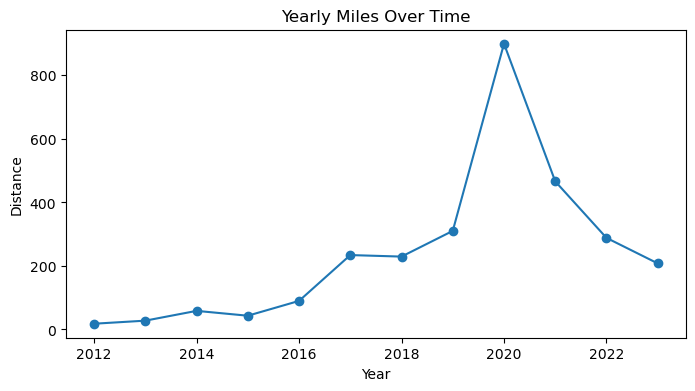

In [120]:
# create a line plot of my running data comparing miles per year
plt.figure(figsize=(8, 4))
plt.plot(running_df['Year'], running_df['Distance'], marker = 'o', linestyle = '-')
plt.title('Yearly Miles Over Time')
plt.xlabel('Year')
plt.ylabel('Distance')

#### b. Scatter

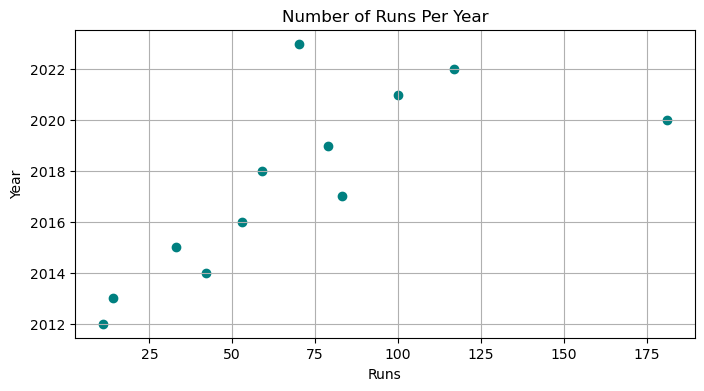

In [121]:
# create a scatter plot of my running data showing the number of runs per year
plt.figure(figsize=(8, 4))
plt.scatter(running_df['Runs'], running_df['Year'], color = 'teal', marker = 'o')
plt.title('Number of Runs Per Year')
plt.xlabel('Runs')
plt.ylabel('Year')
plt.grid(True)

#### c. Bar

Text(0, 0.5, 'Avg. Distance')

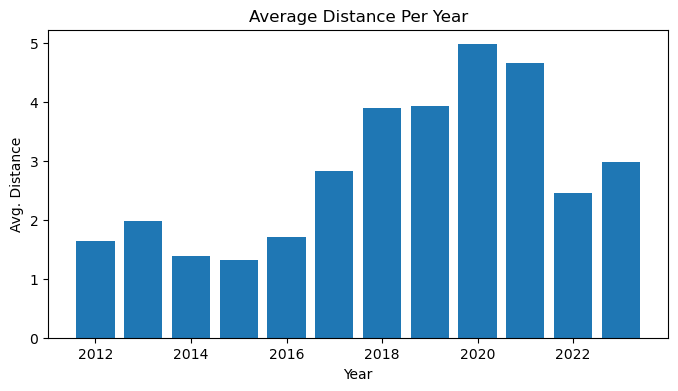

In [122]:
# create a bar plot of my running data to show the average distance ran per year
plt.figure(figsize=(8, 4))
plt.bar(running_df['Year'], running_df['Avg. Distance'])
plt.title('Average Distance Per Year')
plt.xlabel('Year')
plt.ylabel('Avg. Distance')